<table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/drive/1NAAmrNezexyIlT-ZXWlCWi7bD-8YptWN?usp=sharing"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab</a>
  </td>
  <td>
    <a target="_blank" href="https://github.com/bagussatya/technical-test/blob/main/README.md/Financial_News_Sentiment.ipynb"><img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />View source on GitHub</a>
  </td>
</table>

#Libraries

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

#Data

In [ ]:
#Membaca Data
df = pd.read_csv('/content/financial_news_data.csv',
                 encoding="ISO-8859-1")
df.head(4)

,sentiment,news_headline
0,neutral,"According to Gran , the company has no plans t..."
1,neutral,Technopolis plans to develop in stages an area...
2,negative,The international electronic industry company ...
3,positive,With the new production plant the company woul...


In [ ]:
#Melihat info dari data yang telah dibaca
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4843 entries, 0 to 4842
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   sentiment      4843 non-null   object
 1   news_headline  4843 non-null   object
dtypes: object(2)
memory usage: 75.8+ KB


neutral     2878
positive    1362
negative     603
Name: sentiment, dtype: int64


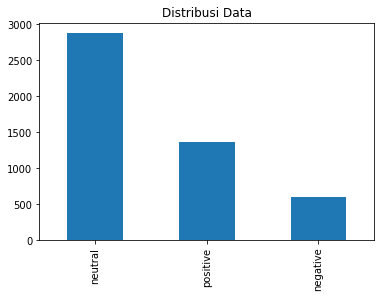

In [ ]:
#Melihat persebaran data
df['sentiment'].value_counts().plot(kind='bar')
plt.title('Distribusi Data')
print(df['sentiment'].value_counts())

#Preprocessing Data

In [ ]:
X = df[['news_headline']]
y = df[['sentiment']].replace({'negative':0, #Mengubah nilai string negative pada label menjadi angka 0
                               'positive':1, #Mengubah nilai string positive pada label menjadi angka 1
                               'neutral':2}) #Mengubah nilai string neutral pada label menjadi angka 2

In [ ]:
df[['sentiment']].head(4)

,sentiment
0,neutral
1,neutral
2,negative
3,positive


In [ ]:
y.head(4)

,sentiment
0,2
1,2
2,0
3,1


In [ ]:
#Menghilangkan stopwords pada data
import nltk
from nltk.corpus import stopwords
import re

nltk.download('stopwords')

stop_words = stopwords.words('english')
cleaned_data = []

for i in range(len(X)):
  review = re.sub('[^a-zA-Z]', ' ', X.iloc[i]['news_headline']) #menghilangkan punctuation dan angka
  review = review.lower().split() #lowercase dan split

  review = [word for word in review if (word not in stop_words)] #melakukan stemming dan menghilangkan stopwords
  review = ' '.join(review) #digabungkan
    
  cleaned_data.append(review) #disimpan dalam variable cleaned_data

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
X[:5].values

array([['According to Gran , the company has no plans to move all production to Russia , although that is where the company is growing .'],
       ['Technopolis plans to develop in stages an area of no less than 100,000 square meters in order to host companies working in computer technologies and telecommunications , the statement said .'],
       ['The international electronic industry company Elcoteq has laid off tens of employees from its Tallinn facility ; contrary to earlier layoffs the company contracted the ranks of its office workers , the daily Postimees reported .'],
       ['With the new production plant the company would increase its capacity to meet the expected increase in demand and would improve the use of raw materials and therefore increase the production profitability .'],
       ["According to the company 's updated strategy for the years 2009-2012 , Basware targets a long-term net sales growth in the range of 20 % -40 % with an operating profit margin of 10 % -20 %

In [ ]:
X['news_headline'] = cleaned_data
X[:5].values

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


array([['according gran company plans move production russia although company growing'],
       ['technopolis plans develop stages area less square meters order host companies working computer technologies telecommunications statement said'],
       ['international electronic industry company elcoteq laid tens employees tallinn facility contrary earlier layoffs company contracted ranks office workers daily postimees reported'],
       ['new production plant company would increase capacity meet expected increase demand would improve use raw materials therefore increase production profitability'],
       ['according company updated strategy years basware targets long term net sales growth range operating profit margin net sales']],
      dtype=object)

In [ ]:
#Memisahkan antara data training dan testing untuk mengetahui performa model
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(4358, 1) (4358, 1)
(485, 1) (485, 1)


In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

vocab_size = 5000
embedding_dim = 16
max_length = 120
trunc_type ='post'
padding_type ='post'
oov_tok = '<OOV>'

tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok) #membuat tokenizer
tokenizer.fit_on_texts(X_train['news_headline']) #mengambil kosakata di kalimat data training
word_index = tokenizer.word_index #mengambil word index
sequences = tokenizer.texts_to_sequences(X_train['news_headline']) #mengubah kalimat menjadi susunan kata berdasarkan word index
padded = pad_sequences(sequences,maxlen=max_length, truncating=trunc_type) #mengubah susunan kata menjadi urutan kata

testing_sequences = tokenizer.texts_to_sequences(X_test['news_headline']) #untuk data testing
testing_padded = pad_sequences(testing_sequences,maxlen=max_length) #untuk data testing

In [ ]:
padded[0]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,  987, 4238, 4239, 1304, 1305,  907, 1660, 1305, 4240],
      dtype=int32)

#Wordcloud

In [ ]:
df2 = df.copy()
df2['news_headline'] = cleaned_data
df_grouped = df2.groupby(by='sentiment').agg(lambda x:' '.join(x))
df_grouped.head()

,news_headline
sentiment,
negative,international electronic industry company elco...
neutral,according gran company plans move production r...
positive,new production plant company would increase ca...


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(analyzer='word')
data = cv.fit_transform(df_grouped['news_headline'])

df_dtm = pd.DataFrame(data.toarray(), columns=cv.get_feature_names())
df_dtm.index = df_grouped.index
df_dtm.head()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,aaland,aalborg,aalto,aaltonen,aaron,aava,aazhang,ab,abb,abbott,aberration,abidjan,abilities,ability,able,abloy,abn,aboavista,abp,abramov,abramovich,abroad,absentee,absolut,absorption,abu,ac,aca,acacia,acanb,acando,accelerate,accelerated,acceptance,accepted,access,accessible,accessories,accident,accommodate,...,yhtym,yhtyma,yield,yiliang,yinhe,yit,yitgroup,ylinen,yliopistonrinne,ylivieska,yokohama,york,young,youtube,yr,yry,ystok,yty,yuval,yvonne,zahariev,zaharova,zain,zainalabedin,zanadvorov,zandvliet,zao,zapadnye,zealand,zepro,zero,zgody,zinc,zip,zloty,zoltan,zone,zoo,zte,zu
sentiment,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
negative,1,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,3,0,0,1,0,0,0,0,8,0,0,1,1,0,0,0,0,0,0,0,0,0,...,0,4,0,0,0,3,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0
neutral,0,0,1,1,1,1,1,17,2,1,1,1,0,0,4,2,2,1,2,1,1,5,1,1,1,1,11,1,2,0,0,0,0,1,0,16,0,8,2,2,...,1,1,3,1,0,18,1,1,2,1,0,7,1,2,0,0,1,2,0,1,0,0,1,1,1,1,2,1,1,1,0,0,1,1,1,0,5,0,1,1
positive,0,1,0,0,0,0,0,9,2,0,0,0,1,2,13,0,1,0,5,0,0,3,0,0,0,0,13,0,0,0,0,1,1,0,1,3,1,2,0,0,...,0,0,0,0,1,16,0,0,0,0,1,0,1,0,2,1,0,0,1,0,1,1,0,0,0,0,0,0,0,0,1,1,9,0,0,0,1,1,0,0


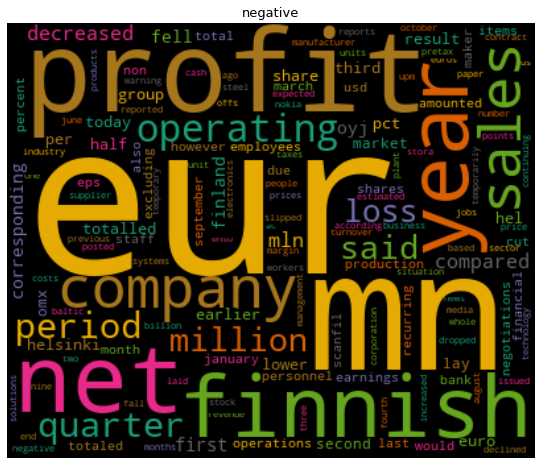

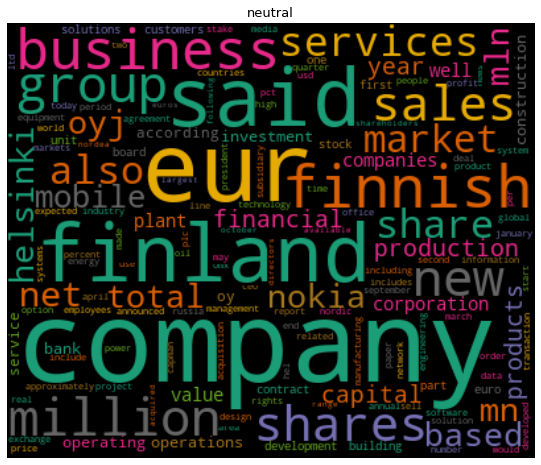

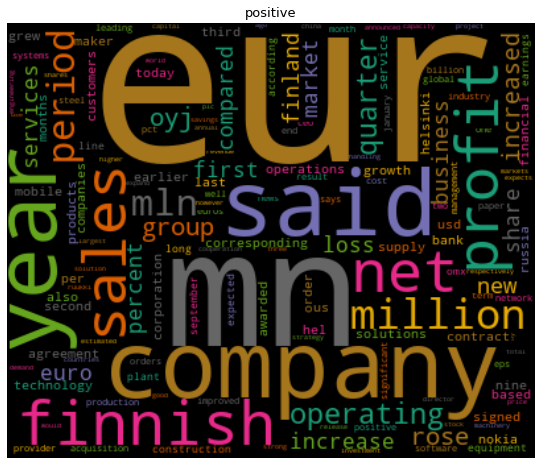

In [ ]:
from wordcloud import WordCloud
from textwrap import wrap

def generate_wordcloud(data,title):
  wc = WordCloud(width=400, height=330, max_words=150,colormap="Dark2").generate_from_frequencies(data)

  plt.figure(figsize=(10,8))
  plt.imshow(wc, interpolation='bilinear')
  plt.axis("off")
  plt.title('\n'.join(wrap(title,60)),fontsize=13)
  plt.show()
  
df_dtm=df_dtm.transpose()

# Plotting word cloud for each product
for index, rating in enumerate(df_dtm.columns):
  generate_wordcloud(df_dtm[rating].sort_values(ascending=False), rating)

#Model

##Naive Bayes

In [ ]:
from sklearn.naive_bayes import MultinomialNB

model_nb = MultinomialNB()
model_nb.fit(padded, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MultinomialNB()

In [ ]:
y_pred_nb = model_nb.predict(testing_padded)

In [ ]:
nb_acc = accuracy_score(y_test, y_pred_nb) * 100
print('{:.2f}%'.format(nb_acc))

46.39%


In [ ]:
print(classification_report(y_test, y_pred_nb))

              precision    recall  f1-score   support

           0       0.13      0.28      0.17        57
           1       0.38      0.31      0.34       135
           2       0.67      0.57      0.62       293

    accuracy                           0.46       485
   macro avg       0.39      0.39      0.38       485
weighted avg       0.53      0.46      0.49       485



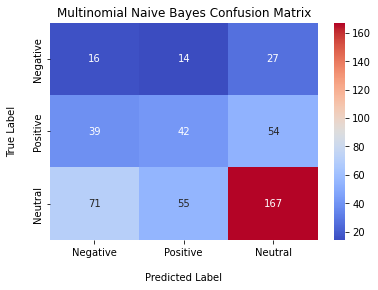

In [ ]:
sns.heatmap(confusion_matrix(y_test, y_pred_nb)
            ,annot=True,cmap='coolwarm',fmt='g')
plt.ylabel('True Label\n')
plt.yticks([0.5, 1.5, 2.5], ['Negative','Positive','Neutral'])
plt.xticks([0.5, 1.5, 2.5], ['Negative','Positive','Neutral'])
plt.xlabel('\nPredicted Label')
plt.title('Multinomial Naive Bayes Confusion Matrix')
plt.show()

##Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

model_dt = DecisionTreeClassifier(max_depth=8)
model_dt.fit(padded, y_train)

DecisionTreeClassifier(max_depth=8)

In [ ]:
y_pred_dt = model_dt.predict(testing_padded)

In [ ]:
dt_acc = accuracy_score(y_test, y_pred_dt) * 100
print('{:.2f}%'.format(dt_acc))

60.62%


In [ ]:
print(classification_report(y_test, y_pred_dt))

              precision    recall  f1-score   support

           0       0.30      0.19      0.23        57
           1       0.39      0.16      0.23       135
           2       0.67      0.89      0.76       293

    accuracy                           0.61       485
   macro avg       0.45      0.42      0.41       485
weighted avg       0.55      0.61      0.55       485



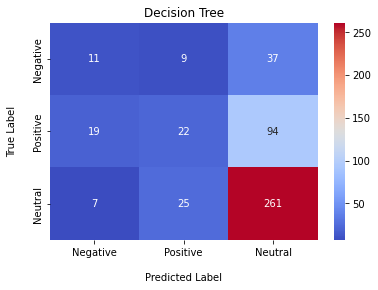

In [ ]:
sns.heatmap(confusion_matrix(y_test, y_pred_dt)
            ,annot=True,cmap='coolwarm',fmt='g')
plt.ylabel('True Label\n')
plt.yticks([0.5, 1.5, 2.5], ['Negative','Positive','Neutral'])
plt.xticks([0.5, 1.5, 2.5], ['Negative','Positive','Neutral'])
plt.xlabel('\nPredicted Label')
plt.title('Decision Tree')
plt.show()

##Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier()
model_rf.fit(padded, y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


RandomForestClassifier()

In [ ]:
y_pred_rf = model_rf.predict(testing_padded)

In [ ]:
rf_acc = accuracy_score(y_test, y_pred_rf) * 100
print('{:.2f}%'.format(rf_acc))

64.95%


In [ ]:
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.60      0.11      0.18        57
           1       0.52      0.18      0.27       135
           2       0.66      0.97      0.79       293

    accuracy                           0.65       485
   macro avg       0.60      0.42      0.41       485
weighted avg       0.62      0.65      0.57       485



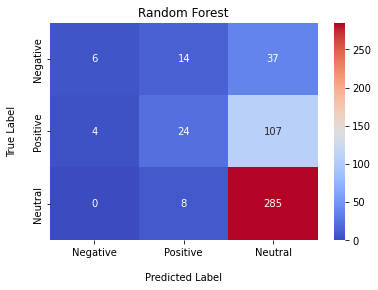

In [ ]:
sns.heatmap(confusion_matrix(y_test, y_pred_rf)
            ,annot=True,cmap='coolwarm',fmt='g')
plt.ylabel('True Label\n')
plt.yticks([0.5, 1.5, 2.5], ['Negative','Positive','Neutral'])
plt.xticks([0.5, 1.5, 2.5], ['Negative','Positive','Neutral'])
plt.xlabel('\nPredicted Label')
plt.title('Random Forest')
plt.show()

##Deep Learning

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, Dense

model_dl = Sequential()
model_dl.add(Embedding(vocab_size, embedding_dim, input_length=max_length))
model_dl.add(LSTM(64, return_sequences=True))
model_dl.add(LSTM(64, return_sequences=True))
model_dl.add(LSTM(32))
model_dl.add(Dense(3, activation='softmax'))

In [ ]:
model_dl.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 120, 16)           80000     
                                                                 
 lstm_3 (LSTM)               (None, 120, 64)           20736     
                                                                 
 lstm_4 (LSTM)               (None, 120, 64)           33024     
                                                                 
 lstm_5 (LSTM)               (None, 32)                12416     
                                                                 
 dense_2 (Dense)             (None, 3)                 99        
                                                                 
Total params: 146,275
Trainable params: 146,275
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model_dl.compile(optimizer='adam',
                 loss='sparse_categorical_crossentropy',
                 metrics=['accuracy'])

In [ ]:
history = model_dl.fit(padded, y_train,
                       validation_split=0.2,
                       epochs=10)

Epoch 1/10
109/109 [==============================] - 60s 241ms/step - loss: 0.9262 - accuracy: 0.5927 - val_loss: 0.8508 - val_accuracy: 0.6273
Epoch 2/10
109/109 [==============================] - 22s 202ms/step - loss: 0.7154 - accuracy: 0.6879 - val_loss: 0.7553 - val_accuracy: 0.6640
Epoch 3/10
109/109 [==============================] - 25s 232ms/step - loss: 0.5342 - accuracy: 0.7717 - val_loss: 0.8132 - val_accuracy: 0.6445
Epoch 4/10
109/109 [==============================] - 23s 210ms/step - loss: 0.4199 - accuracy: 0.8167 - val_loss: 1.0321 - val_accuracy: 0.6445
Epoch 5/10
109/109 [==============================] - 23s 214ms/step - loss: 0.3603 - accuracy: 0.8468 - val_loss: 0.9915 - val_accuracy: 0.6617
Epoch 6/10
109/109 [==============================] - 24s 219ms/step - loss: 0.2894 - accuracy: 0.8939 - val_loss: 1.1584 - val_accuracy: 0.6537
Epoch 7/10
109/109 [==============================] - 25s 226ms/step - loss: 0.2224 - accuracy: 0.9208 - val_loss: 1.2757 - val_ac

In [ ]:
y_pred_dl = model_dl.predict(testing_padded)

In [ ]:
y_pred_dl[:5]

array([[1.4999449e-04, 3.3107743e-04, 9.9951899e-01],
       [1.3475204e-04, 2.8305952e-04, 9.9958223e-01],
       [1.5020784e-04, 2.9036688e-04, 9.9955946e-01],
       [1.2708128e-04, 2.4914430e-04, 9.9962378e-01],
       [5.2354671e-04, 1.1777644e-03, 9.9829870e-01]], dtype=float32)

In [ ]:
y_pred_dl = np.argmax(y_pred_dl, axis=1)
y_pred_dl[:5]

array([2, 2, 2, 2, 2])

In [ ]:
dl_acc = accuracy_score(y_test, y_pred_dl) * 100
print('{:.2f}%'.format(dl_acc))

72.99%


In [ ]:
print(classification_report(y_test, y_pred_dl))

              precision    recall  f1-score   support

           0       0.60      0.65      0.62        57
           1       0.64      0.47      0.54       135
           2       0.78      0.86      0.82       293

    accuracy                           0.73       485
   macro avg       0.67      0.66      0.66       485
weighted avg       0.72      0.73      0.72       485



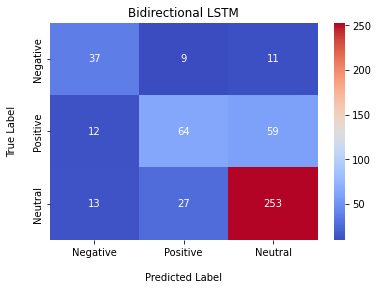

In [ ]:
sns.heatmap(confusion_matrix(y_test, y_pred_dl)
            ,annot=True,cmap='coolwarm',fmt='g')
plt.ylabel('True Label\n')
plt.yticks([0.5, 1.5, 2.5], ['Negative','Positive','Neutral'])
plt.xticks([0.5, 1.5, 2.5], ['Negative','Positive','Neutral'])
plt.xlabel('\nPredicted Label')
plt.title('Bidirectional LSTM')
plt.show()

#Perbandingan Model

Model LSTM memiliki tingkat akurasi yang lebih baik dibandingkan dengan model Naive Bayes, Decision Tree, dan Random Forest. Oleh karena itu, maka model dengan LSTM akan digunakan untuk memprediksi data testing yang telah disediakan

In [ ]:
df_test = pd.read_csv('/content/data_for_test_the_model.csv')
df_test

,number,news_headline
0,1,The 2015 target for net sales has been set at ...
1,2,It holds 38 percent of Outokumpu 's shares and...
2,3,"As a result of these transactions , the aggreg..."


In [ ]:
df_test2 = df_test.copy()
for i in range(len(df_test)):
  review = re.sub('[^a-zA-Z]', ' ', df_test.iloc[i]['news_headline']) #menghilangkan punctuation dan angka
  review = review.lower().split() #lowercase dan split

  review = [word for word in review if (word not in stop_words)] #melakukan stemming dan menghilangkan stopwords
  review = ' '.join(review) #digabungkan

  df_test2.loc[i, 'news_headline'] = review

In [ ]:
df_test2

,number,news_headline
0,1,target net sales set eur bn target return inve...
1,2,holds percent outokumpu shares voting rights l...
2,3,result transactions aggregate holdings burrill...


In [ ]:
new_testing_sequences = tokenizer.texts_to_sequences(df_test['news_headline']) #untuk data testing
new_testing_padded = pad_sequences(new_testing_sequences,maxlen=max_length) #untuk data testing

In [ ]:
y_test_pred = model_dl.predict(new_testing_padded)
y_test_pred = np.argmax(y_test_pred, axis=1)

In [ ]:
df_test['sentiment'] = y_test_pred

In [ ]:
df_test['sentiment'] = df_test[['sentiment']].replace({0:'negative',
                                                       1:'positive',
                                                       2:'neutral'})

In [ ]:
df_test

,number,news_headline,sentiment
0,1,The 2015 target for net sales has been set at ...,neutral
1,2,It holds 38 percent of Outokumpu 's shares and...,neutral
2,3,"As a result of these transactions , the aggreg...",negative


In [ ]:
df_test.to_csv('Hasil Prediksi Sentiment Analysis.csv',index=False)

In [ ]:
model_dl.save("Model LSTM.h5")

#Kesimpulan
Walaupun model deep learning memiliki akurasi tertinggi, namun nilai akurasinya masih kurang bagus, hal ini dapat disebabkan karena data yang dimiliki bersifat imbalance, artinya sebaran antara setiap kelas nya tidak seimbang. Untuk mengatasi masalah ini, dapat dilakukan balancing data contohnya dengan menggunakan SMOTE